In [147]:

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [173]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler  = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [149]:
# model = keras.models.Sequential([
#     keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
#     keras.layers.Dense(1)
# ])


In [174]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [151]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_51 (Dense)            (None, 30)                270       
                                                                 
 dense_52 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [175]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [176]:
history = model.fit( X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.7633 - accuracy: 0.0029 - val_loss: 1.2215 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 0s 605us/step - loss: 0.4748 - accuracy: 0.0029 - val_loss: 4.4651 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 0s 825us/step - loss: 0.5038 - accuracy: 0.0027 - val_loss: 5.9204 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 0s 594us/step - loss: 0.4446 - accuracy: 0.0029 - val_loss: 1.7339 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 0s 525us/step - loss: 0.4153 - accuracy: 0.0028 - val_loss: 0.3840 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 0s 699us/step - loss: 0.3963 - accuracy: 0.0028 - val_loss: 0.3784 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 0s 577us/step - loss: 0.3970 - accuracy: 0.0029 - val_loss: 0.3682 - val_accuracy: 0

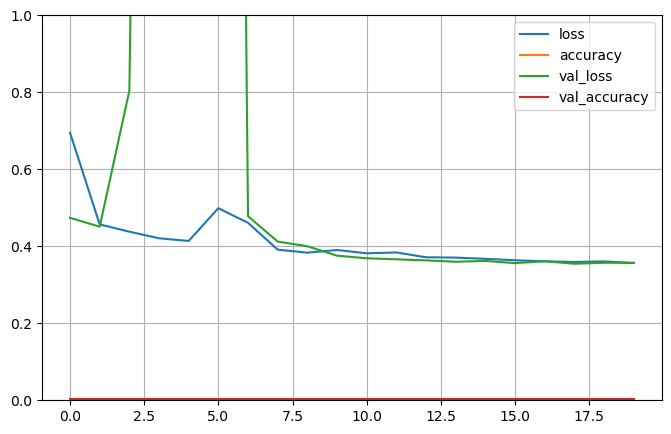

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [155]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 824us/step - loss: 0.3527 - accuracy: 0.0021


### Building Wide & Deep Neural Network

In [156]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden_1 = keras.layers.Dense(30, activation = 'relu')(input_)
hidden_2 = keras.layers.Dense(30, activation = 'relu')(hidden_1)
concat = keras.layers.Concatenate()([input_, hidden_2])
output  = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])



In [157]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_53 (Dense)            (None, 30)                   270       ['input_8[0][0]']             
                                                                                                  
 dense_54 (Dense)            (None, 30)                   930       ['dense_53[0][0]']            
                                                                                                  
 concatenate_10 (Concatenat  (None, 38)                   0         ['input_8[0][0]',             
 e)                                                                  'dense_54[0][0]']      

In [158]:
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

In [159]:
history = model.fit( X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20


363/363 [==============================] - 0s 730us/step - loss: 0.7275 - accuracy: 0.0028 - val_loss: 2.4343 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 0s 532us/step - loss: 0.5478 - accuracy: 0.0028 - val_loss: 8.3236 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 0s 515us/step - loss: 0.6731 - accuracy: 0.0026 - val_loss: 5.6275 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 0s 667us/step - loss: 0.4374 - accuracy: 0.0028 - val_loss: 14.9243 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 0s 535us/step - loss: 0.3890 - accuracy: 0.0028 - val_loss: 4.1387 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 0s 516us/step - loss: 0.6956 - accuracy: 0.0027 - val_loss: 1.1616 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 0s 510us/step - loss: 0.4667 - accuracy: 0.0028 - val_loss: 11.4505 - val_accuracy: 0.0044
E

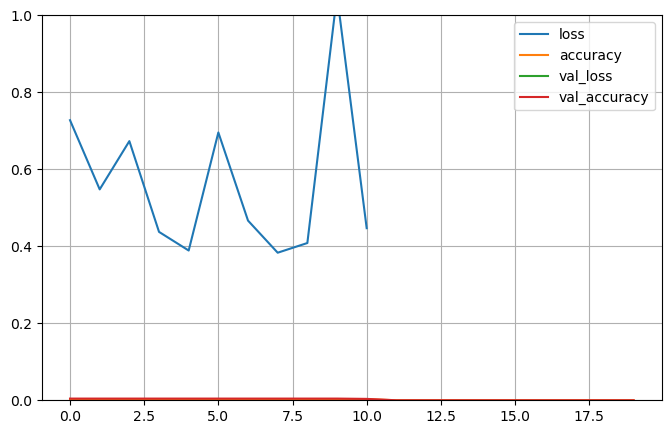

In [160]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [161]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 562us/step - loss: nan - accuracy: 0.0000e+00


### Handling Multiple Inputs in Wide & Deep
- It can be used in many places, to train a nueral network for different tasks
- We can train for both the regression and classification task.
- For images classification we train one part for the smile, the other parts for the edges.

In [162]:


input_A = keras.layers.Input(shape = [5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')

hidden_1 = keras.layers.Dense(30, activation='relu')(input_A)
hidden_2 = keras.layers.Dense(30, activation='relu')(hidden_1)

concat = keras.layers.Concatenate()([input_B, hidden_2])

output = keras.layers.Dense(1,name='output')(concat)

model  = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [163]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 wide_input (InputLayer)     [(None, 5)]                  0         []                            
                                                                                                  
 dense_56 (Dense)            (None, 30)                   180       ['wide_input[0][0]']          
                                                                                                  
 deep_input (InputLayer)     [(None, 6)]                  0         []                            
                                                                                                  
 dense_57 (Dense)            (None, 30)                   930       ['dense_56[0][0]']            
                                                                                           

In [164]:
model.compile(loss='mse', optimizer=keras.optimizers.legacy.SGD(learning_rate=1e-3))

In [169]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=['accuracy'])

X_train_A,X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0227 - accuracy: 0.0026 - val_loss: 1.0067 - val_accuracy: 0.0044
Epoch 2/20
363/363 [==============================] - 0s 581us/step - loss: 0.8201 - accuracy: 0.0029 - val_loss: 1.3297 - val_accuracy: 0.0044
Epoch 3/20
363/363 [==============================] - 0s 611us/step - loss: 0.7574 - accuracy: 0.0029 - val_loss: 1.3781 - val_accuracy: 0.0044
Epoch 4/20
363/363 [==============================] - 0s 525us/step - loss: 0.7135 - accuracy: 0.0029 - val_loss: 1.2223 - val_accuracy: 0.0044
Epoch 5/20
363/363 [==============================] - 0s 691us/step - loss: 0.6793 - accuracy: 0.0029 - val_loss: 1.0155 - val_accuracy: 0.0044
Epoch 6/20
363/363 [==============================] - 0s 533us/step - loss: 0.6473 - accuracy: 0.0029 - val_loss: 1.1541 - val_accuracy: 0.0044
Epoch 7/20
363/363 [==============================] - 0s 538us/step - loss: 0.6239 - accuracy: 0.0029 - val_loss: 1.2310 - val_accuracy: 0

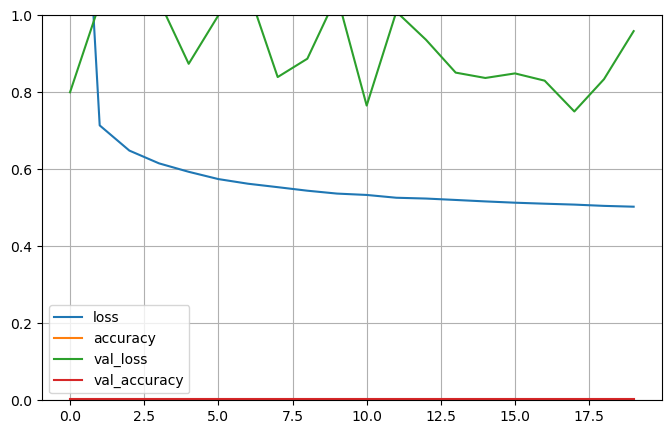

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)


162/162 [==============================] - 0s 384us/step - loss: 0.4989 - accuracy: 0.0021


In [170]:
## Saving a Model
model.save('architeture.h5')

/Users/kavach/miniconda3/envs/tfenv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [171]:
## Loading a model
model = keras.models.load_model('architeture.h5')


### TensorBoard for Visualisation

In [177]:
import os
root_logdir  =os.path.join(os.curdir, 'my_logs')

def get_run_logdir():
    import time
    run_id = time.strftime('run_%Y_%m_%d_%H_%M_%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [178]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=tensorboard_cb)

Epoch 1/30
363/363 [==============================] - 0s 907us/step - loss: 0.3554 - accuracy: 0.0029 - val_loss: 0.9404 - val_accuracy: 0.0044
Epoch 2/30
363/363 [==============================] - 0s 580us/step - loss: 0.3576 - accuracy: 0.0029 - val_loss: 1.7464 - val_accuracy: 0.0044
Epoch 3/30
363/363 [==============================] - 0s 609us/step - loss: 0.3836 - accuracy: 0.0029 - val_loss: 1.8840 - val_accuracy: 0.0044
Epoch 4/30
363/363 [==============================] - 0s 759us/step - loss: 0.3570 - accuracy: 0.0029 - val_loss: 3.6506 - val_accuracy: 0.0044
Epoch 5/30
363/363 [==============================] - 0s 576us/step - loss: 0.3733 - accuracy: 0.0028 - val_loss: 3.4300 - val_accuracy: 0.0044
Epoch 6/30
363/363 [==============================] - 0s 569us/step - loss: 0.3754 - accuracy: 0.0029 - val_loss: 1.2185 - val_accuracy: 0.0044
Epoch 7/30
363/363 [==============================] - 0s 737us/step - loss: 0.3837 - accuracy: 0.0029 - val_loss: 0.3410 - val_accuracy:

In [180]:
%load_ext_tensorboard
%tensorboard --logdir=./my_logs --port=6006

UsageError: Line magic function `%load_ext_tensorboard` not found.
